In [2]:
start = 0
end = 500
for i in range(start, end, 50):
    print(i)
    
start = end
end+= 500

0
50
100
150
200
250
300
350
400
450


In [3]:
start

500

In [4]:
end

1000

In [5]:
for i in range(start, end, 50):
    print(i)
    
start = end
end+= 500

500
550
600
650
700
750
800
850
900
950


In [6]:
start

1000

In [7]:
end

1500

In [1]:
# dependencies
from bs4 import BeautifulSoup
import requests
import json
import pandas as pd
import re
import numpy as np

import time

In [10]:
r = requests.get('https://store.steampowered.com/app/1332010/Stray/').text

In [11]:
soup = BeautifulSoup(r, 'html.parser')

In [12]:
block = soup.find('div', {'class': 'block_content_inner'}).text

In [4]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
test = '11 Jul, 2002'

In [6]:
for i in months:
    if i in test:
        print(i)
        break

Jul


In [10]:
[i for i in months if i in test][0]

'Jul'

In [13]:
import pandas as pd

# load dataset
df = pd.read_csv('games_multi.csv')

In [17]:
test = df['tags'][0]

In [28]:
test

"['Cats', 'Adventure', 'Cyberpunk', 'Cute', 'Atmospheric', 'Exploration', 'Third Person', 'Singleplayer', 'Robots', 'Sci-fi', 'Horror', 'Beautiful', 'Puzzle', 'Indie', 'Dystopian', 'Mystery', 'Open World', 'Stealth', 'Colorful', 'Action']"

In [49]:
start = 0
end = 0
lookfor = "'"

In [70]:
list1=re.findall(r'\b\w+\b',test)

In [71]:
list1[1]

'Adventure'

In [7]:
if first_genre == 'Free' or first_genre == 'Massively':
    match first_genre:
        case 'Free':
            return 'Free to play'
        case 'Massively':
            return 'Massively multiplayer'

SyntaxError: invalid syntax (<ipython-input-7-1bc2ee320c12>, line 2)

In [6]:
!python -V

Python 3.8.5


In [117]:
import pandas as pd

In [307]:
df = pd.read_csv('games_multi.csv')

In [308]:
df['Genres'].head()

0                         ['RPG']
1         ['Adventure,', 'Indie']
2        ['Action,', 'Adventure']
3    ['Action,', 'Indie,', 'RPG']
4        ['Action,', 'Adventure']
Name: Genres, dtype: object

In [309]:
df.head()

,title,Genres,main_genre,sub_genre,price_in_rand,discount_price,discount_percent,release_date,reviews,tags,developer,publisher,game description
0,Digimon Survive,['RPG'],RPG,No genre given,699.00,699.00,NaN,"28 Jul, 2022",Very Positive 82% of the 231 user reviews for ...,"['Anime', 'Tactical RPG', 'Visual Novel', 'Sur...","HYDE, Inc.",Bandai Namco Entertainment Inc.,About This Game Digimon Survive presents a hyb...
1,Stray,"['Adventure,', 'Indie']",Adventure,Indie,195.00,195.00,NaN,"19 Jul, 2022","Overwhelmingly Positive 97% of the 50,119 user...","['Cats', 'Adventure', 'Cyberpunk', 'Cute', 'At...",BlueTwelve Studio,Annapurna Interactive,"About This Game Lost, alone and separated from..."
2,Grand Theft Auto V: Premium Edition,"['Action,', 'Adventure']",Action,Adventure,664.00,248.70,-63%,NaN,"Very Positive 85% of the 1,254,828 user review...",[],Rockstar North,Rockstar Games,About this bundle The Grand Theft Auto V: Prem...
3,Hades,"['Action,', 'Indie,', 'RPG']",Action,Indie,150.00,90.00,-40%,"17 Sep, 2020","Overwhelmingly Positive 98% of the 178,585 use...","['Action Roguelike', 'Indie', 'Roguelite', 'Ac...",Supergiant Games,Supergiant Games,About This Game Hades is a god-like rogue-like...
4,It Takes Two,"['Action,', 'Adventure']",Action,Adventure,649.95,324.97,-50%,"25 Mar, 2021","Overwhelmingly Positive 96% of the 81,897 user...","['Co-op', 'Multiplayer', 'Split Screen', 'Puzz...",\n\n\n,Electronic Arts,About This Game Embark on the craziest journey...


In [315]:
# lets remove the [] 
def no_square_brackets(genres):
    return genres.replace('[','').replace(']','').replace(',','')

In [318]:
import string
print(string.punctuation)

def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [319]:
df['Genres'] = df['Genres'].apply(remove_punctuation)

In [324]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [325]:
count_vectorizer = CountVectorizer()

In [326]:
count_X = count_vectorizer.fit_transform(df['Genres'])
countX = pd.DataFrame(count_X.A, columns=count_vectorizer.get_feature_names())

In [327]:
countX

,access,accounting,action,adventure,animation,audio,casual,content,design,development,...,simulation,software,sports,strategy,to,training,utilities,video,violent,web
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,1,0,1,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
22496,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
22497,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
22498,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [361]:
test = countX.sum()

In [362]:
test

access           1413
accounting          2
action           8951
adventure        7201
animation         107
audio              50
casual           5725
content             7
design            252
development        51
documentary         2
early            1413
editing            27
education          65
free              827
game               51
genre             833
given             833
gore                8
illustration      252
indie           10768
massively         741
modeling          107
movie               2
multiplayer       741
no                833
nudity              5
photo              27
play              827
production        107
publishing        159
racing           1075
rpg              4727
sexual              7
simulation       6766
software           48
sports           1276
strategy         5241
to                827
training           48
utilities         212
video              57
violent            18
web               159
dtype: int64

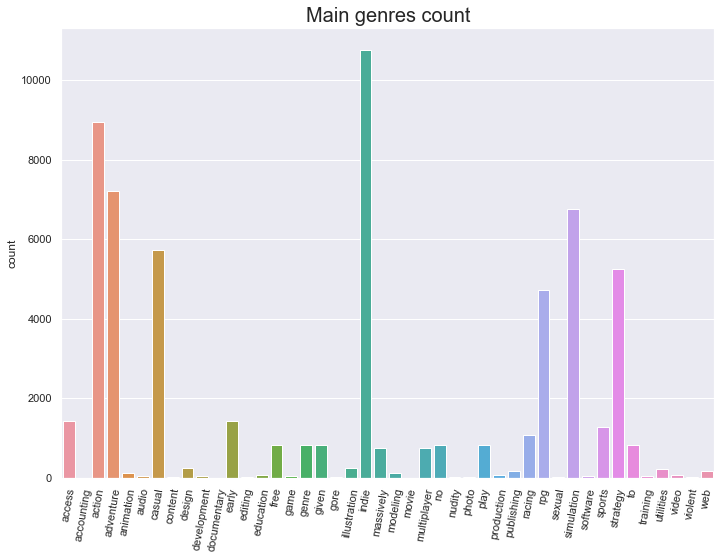

In [377]:
# sns.countplot(data=countX)
test = countX[countX == 1]

sns.countplot(data = test)
plt.xticks(rotation=80)
plt.title("Main genres count",fontsize=20)
# removes text appearing before the plot shows
plt.show()

In [335]:
countX.columns

Index(['access', 'accounting', 'action', 'adventure', 'animation', 'audio',
       'casual', 'content', 'design', 'development', 'documentary', 'early',
       'editing', 'education', 'free', 'game', 'genre', 'given', 'gore',
       'illustration', 'indie', 'massively', 'modeling', 'movie',
       'multiplayer', 'no', 'nudity', 'photo', 'play', 'production',
       'publishing', 'racing', 'rpg', 'sexual', 'simulation', 'software',
       'sports', 'strategy', 'to', 'training', 'utilities', 'video', 'violent',
       'web'],
      dtype='object')

In [316]:
df['Genres'] = df['Genres'].apply(no_square_brackets)

In [317]:
df.head(2)

,title,Genres,main_genre,sub_genre,price_in_rand,discount_price,discount_percent,release_date,reviews,tags,developer,publisher,game description
0,Digimon Survive,'RPG',RPG,No genre given,699.00,699.00,NaN,"28 Jul, 2022",Very Positive 82% of the 231 user reviews for ...,"['Anime', 'Tactical RPG', 'Visual Novel', 'Sur...","HYDE, Inc.",Bandai Namco Entertainment Inc.,About This Game Digimon Survive presents a hyb...
1,Stray,'Adventure' 'Indie',Adventure,Indie,195.00,195.00,NaN,"19 Jul, 2022","Overwhelmingly Positive 97% of the 50,119 user...","['Cats', 'Adventure', 'Cyberpunk', 'Cute', 'At...",BlueTwelve Studio,Annapurna Interactive,"About This Game Lost, alone and separated from..."


In [314]:
df['Genres'].str.join('|').str.get_dummies()

,'Accounting' 'Animation' '&' 'Modeling' 'Audio' 'Production' 'Design' '&' 'Illustration' 'Education' 'Photo' 'Editing' 'Software' 'Training' 'Utilities' 'Video' 'Production' 'Web' 'Publishing','Accounting' 'Animation' '&' 'Modeling' 'Audio' 'Production' 'Design' '&' 'Illustration' 'Education' 'Photo' 'Editing' 'Software' 'Training' 'Utilities' 'Video' 'Production' 'Web' 'Publishing' 'Game' 'Development','Action','Action' 'Adventure','Action' 'Adventure' 'Casual','Action' 'Adventure' 'Casual' 'Free' 'to' 'Play' 'Indie','Action' 'Adventure' 'Casual' 'Free' 'to' 'Play' 'Indie' 'Massively' 'Multiplayer','Action' 'Adventure' 'Casual' 'Free' 'to' 'Play' 'Indie' 'Massively' 'Multiplayer' 'RPG' 'Simulation','Action' 'Adventure' 'Casual' 'Free' 'to' 'Play' 'Indie' 'Massively' 'Multiplayer' 'RPG' 'Simulation' 'Strategy','Action' 'Adventure' 'Casual' 'Free' 'to' 'Play' 'Indie' 'Massively' 'Multiplayer' 'Racing' 'RPG' 'Simulation' 'Sports' 'Strategy',...,'Utilities' 'Video' 'Production' 'Web' 'Publishing' 'Game' 'Development','Utilities' 'Web' 'Publishing','Video' 'Production','Violent' 'Action' 'Adventure' 'Indie','Violent' 'Action' 'Casual' 'Indie' 'Simulation','Violent' 'Gore' 'Action' 'Adventure' 'Indie' 'Early' 'Access' 'RPG' 'Casual' 'Simulation','Violent' 'Gore' 'Adventure' 'Indie','Violent' 'Gore' 'Casual' 'Free' 'to' 'Play' 'Indie' 'Strategy','Web' 'Publishing',no genre given
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
pd.get_dummies(test)

,'Action' 'Adventure','Action' 'Indie' 'RPG','Adventure' 'Indie','RPG'
0,0,0,0,1
1,0,0,1,0
2,1,0,0,0
3,0,1,0,0
4,1,0,0,0


In [52]:
df['Genres'].str.join('|').str.get_dummies()

0                                                    'RPG'
1                                      'Adventure' 'Indie'
2                                     'Action' 'Adventure'
3                                   'Action' 'Indie' 'RPG'
4                                     'Action' 'Adventure'
                               ...                        
22495    'Action' 'Adventure' 'Indie' 'Massively' 'Mult...
22496                        'Casual' 'Indie' 'Simulation'
22497                     'Adventure' 'Indie' 'Simulation'
22498                                          'Adventure'
22499                          'Casual' 'Indie' 'Strategy'
Name: Genres, Length: 22500, dtype: object

In [68]:
sub_set = df['Genres'].head()

In [69]:
sub_set

0                     'RPG'
1       'Adventure' 'Indie'
2      'Action' 'Adventure'
3    'Action' 'Indie' 'RPG'
4      'Action' 'Adventure'
Name: Genres, dtype: object

In [269]:
# list of unique genre
def get_genre(genres):
    unique_genres = []
    temp_list = []
    genre_list =  genres.split(' ')
    for genre in genre_list:
        temp_list.append(genre)
    
#     for i in temp_list:
#         unique_genres.append(i)
        
    return temp_list

In [270]:
test = sub_set.apply(get_genre)

In [271]:
test

0                       ['RPG']
1        ['Adventure', 'Indie']
2       ['Action', 'Adventure']
3    ['Action', 'Indie', 'RPG']
4       ['Action', 'Adventure']
Name: Genres, dtype: object

In [272]:
for i in test:
    for j in i:
        print(j)

'RPG'
'Adventure'
'Indie'
'Action'
'Adventure'
'Action'
'Indie'
'RPG'
'Action'
'Adventure'


In [152]:
import re

genres = []
for i in df['Genres']:
#     print(i.split(' '))
    if i == 'no genre given':
        genres.append(i)
    else:
        i = i.split(' ')
        for j in i:
            j = re.sub('\W+','', j)
            genres.append(j)

In [173]:
# set(genres)

In [154]:
from collections import Counter

In [160]:
test = Counter(genres)

In [171]:
test['RPG']

4727

In [186]:
# t = ((1, 'a'),(2, 'b'))
# dict(map(reversed, t))
# {'a': 1, 'b': 2}


temp = []

for i in test:
    temp.append((test[i],i))

In [245]:
test = dict(map(reversed, temp))

In [246]:
test = pd.DataFrame(test.items(),columns=['Genre', 'count'])

In [247]:
# test.set_index('Genre')

In [248]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

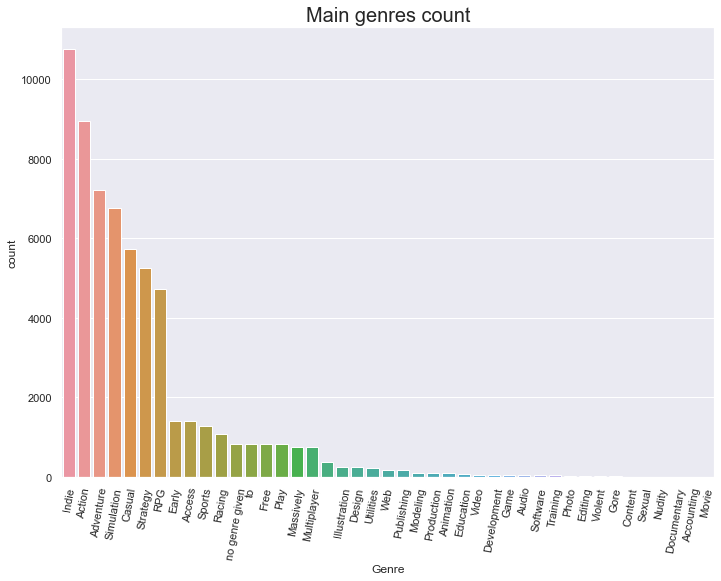

In [268]:
test = test.sort_values('count',ascending=False)
sns.barplot(data = test, x='Genre',y='count')
plt.xticks(rotation=80)
plt.title("Main genres count",fontsize=20)
# removes text appearing before the plot shows
plt.show()

In [3]:
import pandas as pd
import numpy as np


In [4]:
df = pd.read_csv('steam_data.csv')

In [3]:
def string_to_num(price):
    print(price)
    try:
        return np.float(price.replace(' ', ""))
    except:
        return 0

In [4]:
df['price_in_rand'] = df['price_in_rand'].apply(string_to_num)

No price
No price
 195.00
No price
No price
 999.00
 329.00
No price
No price
 999.00
No price
 130.00
 219.00
 849.00
 130.00
No price
 335.00
 219.00
 419.00
 349.95
 349.95
 599.00
No price
No price
 175.00
 649.95
 1 199.95
 449.00
 144.00
 130.00
 999.00
 130.00
 175.00
 699.00
 99.00
No price
 159.00
 299.00
 205.00
 219.00
 79.00
 719.00
No price
 47.00
No price
 399.95
 275.00
 175.00
 979.00
 649.00
 999.00
 999.95
 399.00
 599.00
 105.00
 799.00
 599.00
 599.00
 109.00
 219.00
 249.00
 219.00
 799.95
 219.00
 150.00
 1 069.00
 105.00
 175.00
 130.00
 42.00
 649.00
 219.00
 899.00
No price
 799.00
 452.99
 109.00
 150.00
 349.00
 285.00
No price
 649.95
No price
No price
 849.00
 699.00
 175.00
 130.00
 269.00
 465.00
 1 429.00
 899.00
 529.00
 150.00
 449.00
 799.00
 175.00
 175.00
 150.00
 105.00
 130.00
 150.00
 475.00
 230.00
 329.00
 99.00
 175.00
 349.00
 269.00
 175.00
 175.00
 105.00
 269.00
 130.00
 599.00
No price
 399.00
 150.00
 699.00
 299.00
 649.95
 95.00
 589.0

 349.00
 103.00
 254.00
 42.00
 130.00
 999.00
 219.00
 68.00
 239.00
 249.00
 219.00
 42.00
 79.00
 89.00
 79.00
 130.00
 219.00
 91.99
 79.00
 79.00
 150.00
 289.99
 469.00
 329.00
 42.00
 205.00
 68.00
 130.00
 68.00
 359.00
 275.00
 205.00
 280.00
 150.00
 44.00
 87.00
 105.00
 150.00
 489.00
 329.00
 143.98
 360.00
 2 106.00
 175.00
 125.00
No price
 105.00
 199.00
 99.00
 199.00
 227.99
 979.00
 175.00
 219.00
 105.00
 130.00
 285.98
 68.00
 105.00
 36.00
 159.00
 150.00
 52.00
 130.00
 219.00
 319.00
 229.00
 87.00
 130.00
 88.00
 175.00
 199.00
 219.00
 120.00
 219.00
 449.00
 36.00
No price
 115.00
 268.00
 175.00
 105.00
 786.00
 159.00
 749.00
 499.00
 42.00
 129.00
 130.00
 174.50
 269.00
No price
 130.00
 79.00
 475.00
 214.62
 150.00
 110.00
No price
 995.00
 299.00
 99.00
 115.00
 219.00
 219.00
 105.00
 799.00
 130.00
 1 766.04
 219.00
 299.00
 79.00
 770.40
 79.00
 219.00
 350.00
No price
 55.00
 130.00
 219.00
 79.00
 205.00
 130.00
 130.00
 68.00
No price
 159.00
 29

 109.00
 249.95
 129.00
 249.00
 149.95
 911.99
 149.95
 219.00
 130.00
 109.00
 35.00
 150.00
 105.00
 219.00
 150.00
 130.00
 24.00
 139.00
 79.00
 109.00
 175.00
No price
 629.00
No price
No price
No price
 79.00
 260.00
 150.00
 708.75
 2 327.12
 52.00
 169.00
 129.00
 159.00
 42.00
 47.00
 219.00
 130.00
 130.00
 167.00
 73.00
 79.00
 179.00
 79.00
 375.25
 219.00
 150.00
 169.00
 269.00
 182.00
 105.00
 75.00
 175.00
 58.00
 10.00
 150.00
 105.00
No price
 75.00
 58.00
 169.00
 150.00
 105.00
 65.00
 42.00
 42.00
No price
 74.95
 319.00
 95.00
 319.00
 49.00
 99.00
 27.00
 279.00
 130.00
 949.00
 150.00
 249.00
 130.00
 219.00
 219.00
 25.50
 449.95
 219.00
 175.00
 195.00
 79.00
 98.00
 113.13
 349.95
 442.00
 489.00
 169.00
 105.00
 240.00
 105.00
 699.00
No price
 130.00
 275.00
 55.00
 130.00
 120.00
 24.00
 409.00
 130.00
No price
 79.00
 360.00
 299.00
 100.00
 52.00
 105.00
 75.00
 120.00
 130.00
 219.00
 130.00
 130.00
 79.00
 105.00
 50.00
 449.00
 150.00
No price
 350.0

 55.00
 130.00
 110.00
 18.00
 35.00
 130.00
 49.00
 42.00
 142.00
 175.00
 109.00
 130.00
 105.00
 105.00
 349.95
 68.00
 42.00
 109.00
 52.00
 219.00
 55.00
 47.00
 110.00
 58.00
 130.00
 745.99
 259.00
 679.00
 75.00
 42.00
No price
 319.00
 105.00
 130.00
 40.00
 79.00
 120.00
 36.00
 95.00
 52.00
 42.00
 90.00
 109.00
 115.00
 335.00
 42.00
 269.00
 79.00
 175.00
 205.00
 79.00
 52.00
 339.00
 135.49
 42.00
 129.00
 36.00
 539.00
 79.00
 130.00
No price
 457.99
 55.00
No price
 159.00
 139.00
 89.00
 920.70
 319.00
 83.00
 81.50
 59.00
 70.00
 360.00
 105.00
 55.00
 349.95
 79.00
 42.00
 245.00
 149.00
 75.00
 79.00
 219.00
No price
 219.00
 55.00
 105.00
 150.00
 55.00
 59.00
 150.00
No price
 74.95
 18.00
 130.00
 219.00
 159.00
 179.00
 124.00
 79.00
 175.00
 159.00
 79.00
No price
 90.00
 105.00
 25.50
 130.00
 120.00
 219.00
 27.00
 79.00
 129.99
 159.00
 659.00
 175.00
 27.00
 159.00
 139.00
 120.00
 105.00
 52.00
 105.00
 42.00
 36.00
No price
 109.00
 159.00
 105.00
 79.00

 276.00
 88.50
 399.00
 204.30
 55.00
 67.00
 169.00
 737.10
 130.00
 105.00
 159.00
 79.00
 10.00
 52.00
No price
 245.00
 27.00
 129.00
 115.60
 130.00
 39.00
 205.00
 105.00
No price
 105.00
 42.00
 68.00
 130.00
 79.00
 130.00
 169.00
 87.00
 250.00
 25.50
 130.00
 35.00
 219.00
 130.00
 58.00
 130.00
 105.00
 205.00
 130.00
 130.00
 269.00
 549.00
 85.00
 219.00
 150.00
 239.00
 105.00
 89.00
 58.00
 130.00
 728.65
 79.00
 79.00
 105.00
 219.00
 199.00
 69.00
 52.00
 89.00
 68.00
 475.00
 105.00
 105.00
 55.00
 27.00
 10.00
 42.00
 42.00
 87.00
 105.00
 130.00
 42.00
 399.00
 399.00
 80.00
 109.00
 52.00
 47.00
 130.00
No price
 409.00
 175.00
 109.00
 130.00
 47.00
 219.00
 58.00
 150.00
 18.00
 79.00
 449.95
 79.00
 58.00
 105.00
 41.00
 79.00
 70.00
 150.00
 115.00
 219.00
 35.00
 89.00
 79.00
 79.00
 216.75
 76.00
 105.00
 105.00
 79.00
 105.00
 219.00
 10.00
 25.00
 75.00
 109.00
No price
 239.00
 27.00
 130.00
 169.00
 130.00
 58.00
 42.00
 99.00
 79.00
 199.99
 159.00
 27.0

 120.00
 68.00
 27.00
 68.00
 60.00
 18.00
 175.00
 95.00
 79.00
 76.00
 89.00
 49.00
 79.00
 18.00
 305.90
 79.00
 87.00
 129.00
 27.00
 199.00
 155.99
 88.00
 219.00
 319.00
 130.00
 10.00
 79.00
 195.00
 125.00
No price
 24.00
 27.00
 83.00
 105.00
 59.00
 219.00
No price
 130.00
 10.00
 109.00
 35.00
 85.00
 42.00
 79.00
 130.00
 129.00
 97.00
 27.00
 129.00
 42.00
 76.00
 105.00
 159.00
 116.10
 159.00
 1 423.50
No price
 899.00
 58.00
 219.00
 130.00
 699.00
 19.00
 36.00
 175.00
 105.00
 159.00
 79.00
 76.00
 109.00
 79.00
 36.00
 175.00
 130.00
 79.00
 139.00
 100.00
 79.00
No price
 489.00
 150.00
 269.00
 294.00
 42.00
 169.00
 22.00
 79.00
 135.00
 105.00
 55.00
 119.00
 75.00
 175.00
 129.00
 175.00
 95.00
 48.00
 58.00
 83.00
 245.00
 79.00
 52.00
 58.00
 319.00
 159.00
 79.00
 895.99
 205.00
 130.00
 159.00
 302.00
 130.00
 76.00
 219.00
 47.00
 42.00
 109.00
 150.00
 58.00
 125.00
 340.80
 42.00
 127.00
 212.00
 130.00
 249.00
 35.00
 120.00
 130.00
 115.00
 52.00
 150.0

 150.00
 159.00
 130.00
 55.00
 87.00
 109.00
 105.00
 52.00
 237.00
 89.00
 215.00
 42.00
 157.00
 68.00
 36.00
 39.00
 125.00
 99.00
 59.99
 79.00
 36.00
 105.00
 35.00
No price
 313.65
 269.00
 1 196.58
 105.00
 18.00
 109.00
 65.00
 65.00
 586.08
 24.00
 105.00
No price
 138.00
 65.00
No price
 18.00
 130.00
 130.00
 130.00
 15.00
 68.00
 79.00
 89.00
 27.00
 68.00
 105.00
 58.00
 130.00
 109.00
 97.00
 434.85
 219.00
 10.00
 35.00
 42.00
No price
 42.00
 18.00
 68.00
 105.00
 105.00
 55.00
 55.00
 105.00
 88.99
 42.00
 58.00
 150.00
 79.00
 79.00
 295.20
 569.00
 105.00
 42.00
No price
 32.00
 175.00
No price
 10.00
 219.00
 79.00
 35.00
 130.00
 175.00
 120.00
 109.00
 109.00
 109.00
 453.90
 52.00
 42.00
 105.00
 130.00
 79.00
 87.00
 159.00
 36.00
 786.00
 36.00
 105.00
 130.00
 79.00
 215.00
 490.40
 319.00
 175.00
 139.00
 89.00
 79.00
 36.00
 79.00
 219.00
 318.00
 79.00
No price
 18.00
 105.00
 105.00
 79.00
 205.00
 149.00
 58.00
 109.00
 18.00
 109.00
 60.00
 95.00
 219.0

 115.00
 24.00
No price
 465.30
 199.00
 79.00
 18.00
 83.00
 58.00
 130.00
 24.00
 79.00
 130.00
 18.00
 68.00
 42.00
 132.00
 42.00
 15.00
 89.00
 130.00
 42.00
 65.00
 177.30
 95.00
 175.00
 159.00
 36.00
 42.00
 79.00
No price
 105.00
 79.00
 18.00
 10.00
 79.00
 105.00
 346.80
 276.25
 42.00
 12.00
 79.00
 333.00
 130.00
 87.00
 119.00
 42.00
 105.00
 18.00
 11.00
 68.00
 90.00
 169.00
 79.00
No price
 139.00
 99.00
 169.20
 130.00
 219.00
 109.00
 130.00
 105.00
 249.00
 76.00
 76.00
 76.00
 95.00
 11.00
 42.00
 130.00
 130.00
 36.00
 47.00
No price
 42.00
 99.00
 172.00
No price
No price
No price
 79.00
 10.00
 87.00
 150.00
 79.00
 36.00
 105.00
 130.00
No price
 49.00
 130.00
 27.00
 394.00
 36.00
 83.00
 12.00
 18.00
 42.00
 42.00
No price
No price
 59.00
 234.00
 175.00
 79.00
No price
 99.00
 105.00
 141.00
 394.10
 42.00
No price
 10.00
 654.00
 55.00
 79.00
 42.00
 36.00
 12.00
 52.00
 11.00
 79.00
 130.00
 79.00
 12.00
 24.00
 79.00
 159.00
 55.00
 130.00
 149.00
 36.00


 100.00
 79.00
 115.00
 42.00
No price
 76.99
No price
 10.00
 105.00
 27.00
 89.00
 39.99
 24.00
 105.00
 27.00
 18.00
 52.00
 42.00
 455.60
 156.75
 79.00
 15.00
 120.00
 55.00
 219.00
 79.00
 109.00
 10.00
 95.00
 240.00
 42.00
 22.50
 52.00
 12.00
 24.00
 197.10
 109.00
 105.00
 55.00
 24.00
 10.00
 150.00
 58.00
 79.00
 79.00
 109.00
 295.00
 105.00
 65.00
 669.00
 32.00
 68.00
 12.00
 32.00
 44.00
 76.00
No price
No price
No price
 130.00
 36.00
 139.20
 35.00
 269.00
 42.00
 10.00
 336.60
 24.00
 18.00
 27.00
 749.49
 149.00
 109.00
 55.00
 319.00
 10.00
 130.00
 42.00
 219.00
 24.00
 262.00
 42.00
 79.00
No price
 149.00
 85.00
 24.00
 169.00
 24.00
 65.00
 79.00
 89.00
 42.00
 42.00
 42.00
 159.00
 130.00
No price
 42.00
 105.00
 79.00
 79.00
 115.00
 175.00
 145.00
 89.00
 79.00
 730.50
 130.00
 175.00
 18.00
 42.00
 79.00
 130.00
 154.99
 10.00
 79.00
 319.00
 286.00
 58.00
 58.00
 81.00
 175.00
 10.00
 79.00
 116.09
 47.00
 68.00
 42.00
 27.00
 85.00
 79.00
 175.00
 79.00
 

 10.00
No price
 24.00
 18.00
 42.00
 42.00
 42.00
 999.00
 231.00
 130.00
 55.00
 79.00
 42.00
 105.00
 219.00
 159.00
 567.40
 68.00
 109.00
 35.00
 75.00
 105.00
 10.00
 42.00
 42.00
 36.00
 42.00
 105.00
 52.00
 66.50
 42.00
 159.00
 58.00
 68.00
 27.00
 10.00
 42.00
 10.00
 219.00
 127.00
 167.00
 35.00
 18.00
 105.00
 139.00
 569.00
 79.00
 18.00
 27.00
No price
 79.00
 55.00
 95.00
 10.00
 1 080.00
 79.00
 42.00
 79.00
 109.00
 209.00
 175.00
 27.00
 42.00
 162.81
 730.80
 27.00
 55.00
 79.00
 260.00
 244.00
 79.00
 27.00
 47.00
 68.00
 89.00
 44.00
 42.00
 120.00
 341.60
 36.00
 105.00
 36.00
 27.00
 132.00
 18.00
 47.00
 27.00
 172.55
 27.00
 219.00
 69.00
 969.00
 10.00
 68.00
 18.00
 79.00
 76.00
 58.00
 24.00
 655.00
 105.00
 24.00
 10.00
 105.00
 109.00
 36.00
 199.95
 42.00
 295.44
 58.00
 68.00
 180.00
 182.99
 76.00
 219.00
 105.00
 79.00
 79.00
 109.00
 42.00
 105.00
 58.00
 42.00
 19.00
 75.00
 75.00
 33.00
 105.00
 27.00
 42.00
 10.00
 65.00
 42.00
 55.00
 120.00
 22

 120.00
 89.00
 35.00
 95.00
 10.00
 124.50
 24.00
 89.00
 52.00
 18.00
 49.00
 24.00
 52.00
No price
 18.00
 52.00
 409.00
 75.00
 58.00
 150.00
 89.00
 385.00
 105.00
 62.80
 139.00
 89.00
 79.00
 14.00
 79.00
 55.00
 79.00
 36.00
 27.00
 27.00
No price
 58.00
 27.00
 79.00
 42.00
 75.00
 42.00
 42.00
 52.00
 18.00
 58.00
 237.15
 42.00
 42.00
No price
No price
 109.00
 159.00
 68.00
 47.00
 18.00
 79.00
 10.00
 42.00
 42.00
 79.00
 139.00
 79.00
 79.00
 388.50
 79.00
 79.00
 79.00
 516.25
 42.00
 18.00
 109.00
 613.50
No price
 68.00
 12.00
 12.00
 12.00
 79.00
 12.00
 105.00
 95.00
 79.00
 27.00
 97.00
 10.00
 55.00
 105.00
 10.00
 27.00
 52.00
 36.00
 476.00
 219.00
 79.00
No price
 130.00
 175.00
 10.00
No price
 52.00
 319.00
 79.00
 42.00
 79.00
 139.00
 105.00
 35.00
 97.00
 153.99
 65.00
 390.00
 42.00
 89.00
 42.00
 219.00
 58.00
 105.00
 18.00
 109.00
 42.00
 18.00
 89.00
 36.00
 36.00
 10.00
 109.00
 36.00
 523.00
 36.00
 68.00
 76.00
 58.00
No price
 75.00
 42.00
 39.00
 

 42.00
No price
 10.00
 10.00
 12.00
No price
 27.00
 97.00
 10.00
 10.00
 95.00
 42.00
 42.00
 64.80
 10.00
 35.00
 27.00
 10.00
 18.00
 644.40
 41.00
 52.00
 205.00
 258.30
 75.00
 342.00
 189.00
 10.00
 340.10
 42.00
 18.00
 119.00
 17.30
 42.00
 110.00
 18.00
 219.00
 55.00
 18.00
 109.00
 233.75
 68.00
 75.00
 36.00
 175.70
 68.00
 58.00
 68.00
 42.00
 42.00
 18.00
 182.99
 79.00
 42.00
 27.00
 58.00
 10.00
 42.00
 219.00
 10.00
 10.00
 18.00
 102.60
 18.00
 338.52
 27.00
 89.00
 125.00
 193.00
 79.00
 58.00
 89.00
 169.15
 27.00
 159.00
 79.00
 42.00
No price
 109.00
 42.00
 42.00
 474.00
 35.00
 18.00
 42.00
 68.00
 150.00
 42.00
 42.00
 87.00
 42.00
 10.00
 18.00
 244.80
 10.00
 219.00
 10.00
 35.00
 79.00
 44.00
 18.00
 208.00
 130.00
 10.00
 217.60
 42.00
 18.00
 68.00
 24.00
 27.00
 18.00
 85.00
 18.00
 27.00
 29.60
 10.00
 159.00
 42.00
 293.00
 76.00
 219.00
 109.00
 240.49
 75.00
 55.00
 79.00
 105.00
No price
 52.00
 52.00
 105.00
 10.00
 150.00
 10.00
 110.00
 27.00
No 

No price
No price
 130.15
 171.00
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
 269.00
No price
No price
No price
No price
 65.00
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
 52.00
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
 130.00
 105.00
 301.75
No price
 89.00
No price
 24.00
 27.00
 10.00
No price
 44.00
 10.00
 29.00
 102.24
 79.00
 18.00
 109.00
 79.00
 52.00
 42.00
 42.00
 36.00
 199.00
 10.00
 10.00
 42.00
No price
 87.00
 150.00
 109.00
 55.00
 79.00
 79.00
 150.00
 159.00
 10.00
 18.00
 18.00
 65.00
 24.00
No price
 27.00
 58.00
 52.00
 130.00
 18.00
 105.00

 42.00
 55.00
 55.00
 10.00
 10.00
 10.00
 52.00
 52.00
No price
 55.00
 18.00
 99.00
 36.00
 10.00
 65.00
 150.00
 24.00
 85.00
 36.00
 55.00
 159.00
 42.00
 58.00
 42.00
 219.00
 89.00
 18.00
 85.00
 16.00
 18.00
 109.00
 87.00
 109.00
 79.00
 68.00
 79.00
 79.00
 42.00
 105.00
 150.00
 52.00
 10.00
 10.00
 129.00
 99.00
 130.00
 36.00
 79.00
 12.00
 35.00
 42.00
 42.00
 42.00
 10.00
 49.00
 175.00
 97.00
 52.00
 42.00
 79.00
 42.00
 27.00
 55.00
 58.00
 10.00
 714.40
 42.00
 79.00
 18.00
 52.00
 51.75
 10.00
 105.00
 10.00
 109.00
 18.00
 99.00
 10.00
 18.00
 24.00
 36.00
 89.00
 159.00
 27.00
 42.00
 65.00
 89.00
 150.00
 52.00
 18.00
 79.00
 10.00
 58.00
 68.00
No price
 110.00
 95.00
 18.00
 109.00
 47.00
 27.00
 42.00
 85.00
 10.00
 139.00
 110.00
 27.00
 209.00
 42.00
 18.00
 52.00
 12.00
 79.00
 42.00
 159.00
 18.00
 79.00
 160.00
 205.00
 26.00
 36.00
 79.00
 42.00
 79.00
 130.00
 105.00
 36.00
 175.00
 36.00
 55.00
 39.99
 42.00
 79.00
 55.00
 150.00
 47.00
 10.00
 150.00
 1

 65.00
 58.00
 10.00
 42.00
 55.00
 27.00
 10.00
 42.00
 18.00
 18.00
 79.00
 36.00
 58.00
 79.00
 85.00
 18.00
 105.00
No price
 18.00
 883.80
 58.00
 10.00
 299.00
 35.00
 42.00
 56.70
 115.00
 79.00
 18.00
 27.00
 89.00
 130.00
 182.99
 89.00
 10.00
 18.00
 42.00
 10.00
 35.00
 27.00
 42.00
 55.00
 10.00
 76.00
 78.00
 139.00
 42.00
 10.00
 42.00
 79.00
 68.00
 24.00
 79.00
 18.00
 10.00
 24.00
 137.99
 42.00
 79.00
 109.00
 79.00
 10.00
 129.00
 18.00
 79.00
 10.00
 68.00
 149.99
 68.00
 75.00
 24.00
 42.00
 150.00
 10.00
 10.00
 18.00
 249.00
 269.00
 18.00
 55.00
 68.00
 79.00
 42.00
 85.00
 74.50
 269.00
 36.00
 105.00
 150.00
 10.00
 36.00
 52.00
 10.00
 10.00
 79.00
 79.00
 150.00
 42.00
 27.00
 99.00
 18.00
 79.00
 79.00
 169.00
 219.00
 18.00
 27.00
 58.00
 18.00
 18.00
 12.00
No price
 42.00
 27.00
 27.00
 27.00
 36.00
 36.00
 85.00
 85.00
 68.00
 95.00
 79.00
 47.00
 159.00
 79.00
 150.00
 137.99
 18.00
 48 000.00
 18.00
 10.00
 109.00
 255.00
 10.00
 36.00
 42.00
 10.00
 

 268.20
 154.00
 12.00
 50.25
 225.00
 597.60
 542.30
 180.90
 36.00
 54.00
 285.00
 683.20
 215.38
 68.53
 682.10
 165.75
 268.20
 97.75
 250.80
 224.10
 180.90
 305.20
 493.00
 1 237.00
 357.30
 71.34
 40.50
 418.40
 243.20
 72.25
 416.80
 318.25
 559.00
 25.20
 36.00
 67.20
 409.50
 200.33
 124.95
 268.20
 154.00
 12.00
 50.25
 225.00
 597.60
 542.30
 180.90
 36.00
 54.00
 285.00
 683.20
 215.38
 68.53
 682.10
 165.75
 268.20
 563.40
 455.20
 71.19
 130.90
 95.40
 151.20
 117.90
 188.10
 405.90
 180.90
 327.25
 38.00
 283.41
 313.56
 218.70
 57.60
 813.00
 1 596.00
 48.64
 882.00
No price
 179.10
 82.45
 62.50
 295.10
 137.70
 79.90
 48.30
 179.55
 98.77
 407.70
 48.60
 171.52
 109.88
 80.40
 225.42
 38.93
 272.00
 177.65
 349.60
 155.00
 314.10
 89.10
 89.10
 82.20
 104.25
 62.10
 48.60
 81.60
 771.75
 64.18
 84.75
 195.30
 458.25
 328.00
 234.00
 179.55
 150.30
 205.20
 495.90
 523.80
 112.80
 58.10
 85.50
 105.30
 106.50
 41.40
 161.02
 790.32
 241.20
 551.70
 132.30
 614.70
 112

 173.70
 560.00
No price
No price
No price
No price
 131.60
No price
No price
 250.20
 629.00
No price
No price
No price
No price
No price
No price
No price
No price
No price
 258.39
 173.70
 104.06
 153.60
 131.40
No price
No price
 48.00
No price
 359.00
No price
 55.00
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
 102.85
No price
 260.00
 187.20
 81.00
 146.70
 280.80
No price
 300.00
 287.00
 106.20
 482.40
 188.00
No price
No price
No price
No price
No price
No price
 262.00
No price
 324.00
 596.80
 278.80
No price
No price
No price
No price
No price
No price
No price
No price
No price
 260.00
 598.50
No price
No price
No price
 220.00
No price
No price
 262.00
No price
No price
No price
No price
 219.00
No price
 154.99
No price
No price
No price
No price
 234.00
No price
No price
No price
No price
No price
No price
No price
No price
 280.80
No price
No price
 32.00
No price
 262.00
 219.00
 68.00
No price
N

 10.00
 109.00
 79.00
 52.00
 95.00
 55.00
 10.00
 105.00
 36.00
No price
 42.00
 120.00
 35.00
 35.00
 55.00
 10.00
 10.00
No price
 27.00
No price
No price
 409.00
 35.00
 55.00
 185.00
 10.00
 52.00
 58.00
 79.00
 150.00
 159.00
 55.00
 540.90
 65.00
 14.99
 42.00
 35.00
 89.00
 36.00
 105.00
 89.00
 130.00
 89.00
 42.00
 23.00
No price
 58.00
 58.00
 12.00
 159.00
 79.00
 115.00
 79.00
 130.00
 612.92
 159.00
 105.00
 55.00
 42.00
 35.00
 27.00
 79.00
 87.00
 58.00
 47.00
 27.00
 36.00
 95.00
 159.00
 79.00
 18.00
No price
 47.00
 130.00
 275.00
 120.00
 79.00
 58.00
 18.00
 209.00
 55.00
 79.00
No price
 10.00
 27.00
 42.00
No price
 58.00
 36.00
No price
 10.00
 97.00
 105.00
 109.00
 10.00
 109.00
 105.00
 89.00
 10.00
 150.00
 42.00
No price
 42.00
No price
 18.00
 55.00
 130.00
 75.00
 27.00
 120.00
 79.00
No price
 175.00
 52.00
 319.00
 139.00
 79.00
 36.00
No price
 36.00
 52.00
 10.00
 42.00
 105.00
 261.00
 180.00
 105.00
 36.00
 83.00
 130.00
 263.44
 109.00
 109.95
 10.

 79.00
 129.00
 10.00
 42.00
 27.00
 109.00
 10.00
 10.00
No price
 27.00
 42.00
 42.00
 79.00
 79.00
 42.00
 36.00
 133.50
No price
 294.00
 36.00
 10.00
No price
 10.00
 79.00
 36.00
 89.00
 27.00
 99.00
 136.00
 10.00
 10.00
 10.00
 10.00
 18.00
 18.00
 27.00
 109.00
 55.00
 79.00
 10.00
 79.00
 75.00
 105.00
 18.00
 130.00
 95.00
 10.00
 42.00
 10.00
 76.00
 18.00
 109.00
 40.00
 109.00
 155.55
 120.00
 12.00
 210.00
 18.00
 79.00
 87.00
 159.00
 10.00
 219.00
 27.00
 109.00
No price
 36.00
 84.00
 109.00
 79.00
 150.00
 76.00
 552.00
 42.00
 79.00
 10.00
 65.00
 75.00
 42.00
 79.00
 75.00
 477.00
 27.00
 18.00
 18.00
 159.00
 42.00
 55.00
 79.00
 18.00
 42.00
 110.00
 277.40
 159.00
 79.00
 105.00
 10.00
 42.00
 10.00
 10.00
 139.00
 10.00
 10.00
No price
 18.00
 35.00
 10.00
 79.00
 12.00
 76.00
 10.00
 42.00
 85.00
 109.00
 95.00
 10.00
 10.00
 18.00
 109.00
 10.00
 52.00
 109.00
No price
 10.00
 125.00
 65.00
 27.00
 109.00
No price
 36.00
No price
 75.00
 42.00
 10.00
 42.00
 

No price
No price
No price
No price
No price
No price
No price
 146.70
No price
No price
No price
 83.25
No price
No price
 12.00
No price
 130.00
 49.00
No price
No price
No price
No price
No price
 799.00
 799.00
No price
No price
 120.00
No price
No price
No price
No price
No price
No price
 18.00
No price
No price
No price
No price
No price
No price
 419.00
No price
No price
No price
No price
 79.00
 18.00
No price
No price
No price
No price
 18.00
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
 419.00
No price
No price
No price
No price
No price
No price
No price
No price
No price
 245.00
No price
No price
 79.00
No price
No price
No price
 49.00
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
 79.00
No price
No price
 49.00
No price
No price
No price
No price
No price
 130.00
 49.00
No price
No price
No pric

 109.00
No price
 68.99
 42.00
No price
 68.00
 65.00
 130.00
 27.00
 55.00
 142.50
 89.00
 149.00
 55.00
 18.00
 47.00
 95.00
 58.00
 79.00
 79.00
 85.00
 75.00
 55.00
 42.00
 219.00
 159.00
 27.00
 159.00
 42.00
 109.00
 27.00
 79.00
 42.00
 109.00
 219.00
 105.00
 10.00
 55.00
 79.00
 52.00
 130.00
 42.00
 209.00
 58.00
 149.00
 58.00
No price
 79.00
 10.00
 76.00
 10.00
 36.00
 58.00
 76.00
 79.00
 130.00
 260.00
No price
 42.00
No price
 52.00
 105.00
 10.00
 260.00
 120.00
 27.00
 89.00
 79.00
 52.00
 36.00
 76.00
No price
 55.00
 109.00
 68.00
 42.00
 24.00
 42.00
 89.00
 76.00
 10.00
 139.00
 47.00
 52.00
 52.00
 139.00
 150.00
 55.00
 35.00
No price
 159.00
 79.00
 27.00
 89.00
 68.00
 47.00
 79.00
 42.00
 27.00
 679.00
 76.00
 130.00
 211.65
 42.00
 36.00
 76.00
 58.00
 79.00
 89.00
 42.00
 109.00
 42.00
 55.00
 79.00
 79.99
 42.00
No price
 42.00
 87.00
 87.00
 109.00
 55.00
 75.00
 27.00
 76.00
 47.00
 130.00
 95.00
 79.00
 24.00
 269.00
 27.00
 36.00
 42.00
 10.00
 358.20


 36.00
 50.00
 55.00
 24.00
 63.00
 47.00
 89.00
 89.00
 27.00
 10.00
 10.00
 75.00
 10.00
 12.00
 10.00
 27.00
 36.00
 35.00
 10.00
 18.00
 12.00
 24.00
 47.00
 159.00
 85.00
 24.00
 42.00
 47.00
 55.00
 10.00
 87.00
 42.00
 60.00
 75.00
 47.00
 27.00
 76.00
 89.00
 9.00
 18.00
No price
 120.00
 24.00
 10.00
 10.00
 79.00
 18.00
 10.00
 10.00
 120.00
 18.00
 18.00
 79.00
 10.00
 42.00
No price
 68.00
 100.92
No price
 109.00
 27.00
 27.00
 24.00
 36.00
 10.00
 12.00
 68.00
 55.00
 55.00
 109.00
 12.00
 95.00
 58.00
 76.00
 10.00
 18.00
 68.00
 10.00
 18.00
 10.00
 10.00
 85.00
 139.00
 10.00
 79.00
No price
 27.00
 10.00
 35.00
 18.00
 79.00
 47.00
 18.00
 10.00
 10.00
 36.00
 76.00
 18.00
 40.00
 18.00
 109.00
 68.00
 12.00
 42.00
 58.00
 36.00
 47.00
 35.00
 27.00
 10.00
 109.00
 79.00
 47.00
 10.00
 12.00
 18.00
 18.00
 130.00
 24.00
 27.00
 10.00
 65.00
No price
 42.00
 27.00
 10.00
 159.00
 129.00
 52.00
 10.00
 55.00
No price
 10.00
No price
 10.00
 10.00
 31.00
 27.00
 10.00
 1

No price
 682.00
 399.00
No price
No price
 235.00
 124.50
 818.00
 340.80
No price
 44.10
No price
 499.00
No price
No price
No price
No price
 124.00
No price
No price
No price
No price
No price
No price
 499.00
No price
No price
No price
 275.00
 1 261.00
No price
 235.00
No price
No price
No price
No price
No price
No price
 663.00
 168.00
 265.50
No price
No price
No price
No price
No price
No price
No price
No price
 245.00
No price
No price
No price
No price
 399.00
No price
No price
No price
No price
 2 697.00
 670.40
No price
No price
No price
No price
 399.00
No price
 663.00
 168.00
 265.50
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
 235.00
 499.00
No price
No price
No price
No price
No price
No price
No price
No price
 539.00
 1 156.00
No price
No price
No price
 43.20
 602.65
 86.70
 142.20
 25.20
No price
 489.00
No price
No price
No price
No price
No price
No price
 670.40
 2 697.00
 190.40
 55.44
No price
No price


 379.00
No price
No price
No price
No price
 239.00
No price
 749.00
No price
No price
No price
 319.00
 219.00
 219.00
 120.00
 199.00
No price
 249.00
 109.00
 370.00
No price
 219.00
 42.00
No price
 239.00
No price
 749.00
No price
 529.00
No price
 629.00
No price
No price
 399.00
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
 409.99
No price
No price
No price
No price
 1 499.00
No price
 219.00
 205.00
No price
No price
No price
No price
No price
No price
 269.00
 300.00
 55.00
 319.00
 309.00
 1 990.00
 36.00
 109.00
 419.00
 79.00
 175.00
 103.00
 52.00
 589.99
 209.00
 109.00
 219.00
 36.00
 279.00
 62.00
 949.00
 949.00
 88.00
 32.00
 79.00
No price
 32.00
 81.50
 245.00
 78.89
 62.00
 75.00
 79.00
 142.00
 36.00
 75.00
No price
 600.00
 81.50
 75.00
 600.00
 816.38
 68.00
 42.00
 42.00
 85.00
 79.00
 49.00
 409.00
 155.00
 79.00
 85.80
 79.00
No price
 499.95
 74.95
 68.00
 79.00
 949.00

 18.00
 22.50
 68.00
 36.00
 58.00
 42.00
 32.00
 130.00
 76.00
 35.00
 52.00
 18.00
 190.00
 24.00
 86.99
 79.00
 111.18
 270.00
 127.00
 58.00
 105.00
 130.00
 110.00
 218.99
 42.00
 18.00
 130.00
 130.00
 222.99
 130.00
 27.00
 18.00
 42.00
 95.00
 18.00
 36.00
 10.00
 42.00
 75.00
 52.00
 18.00
 58.00
 27.00
 109.00
 42.00
 79.00
 27.00
 175.00
 58.00
 36.00
 68.00
 52.00
 79.00
 52.00
 79.00
 10.00
 36.00
 42.00
 36.00
 109.00
 42.00
 79.00
 79.00
 85.30
 24.00
 24.00
 219.00
 190.00
 18.00
 42.00
 52.00
 55.00
 175.00
 10.00
No price
No price
 68.00
 18.00
 58.00
 77.00
 105.00
 109.00
No price
 105.00
 159.00
 150.00
 55.00
 109.00
 42.00
 32.00
 42.00
 182.00
 58.00
 18.00
 39.95
 36.00
 109.00
 52.00
 219.00
 111.86
 319.00
 68.00
No price
 10.00
 27.00
 55.00
 29.00
 27.00
 39.00
 65.00
 38.00
 79.00
 1 850.00
 150.00
 219.00
 127.00
 109.00
 10.00
 79.00
 42.00
 24.00
 105.00
 10.00
 99.00
 79.00
 44.99
 150.00
 109.00
 42.00
 42.00
 139.00
 58.00
 219.00
 175.00
 150.00
 95

 150.00
 95.00
 175.00
 36.00
 299.99
 42.00
 125.00
 56.00
 61.50
 35.00
 42.00
 79.00
 58.00
 130.00
 42.00
 79.00
 56.00
 79.00
 79.00
 169.00
 79.00
 79.00
 259.00
 359.00
 58.00
 74.00
 24.00
 42.00
 41.99
 42.00
 42.00
 79.00
 79.00
 19.00
 89.00
 18.00
 41.99
 42.00
 99.00
 130.00
 36.00
 44.99
 115.00
 79.00
 110.00
 42.00
 58.00
 105.00
 182.00
 130.00
 41.99
 99.00
 85.00
 169.00
 88.00
 32.00
 40.00
 27.00
 27.00
 79.00
 130.00
 43.00
 85.00
 1 099.00
 27.00
 15.00
 159.00
 79.00
 109.00
 42.00
 79.00
 89.00
 27.00
 150.00
 27.00
 42.00
 18.00
 219.00
 15.00
 27.00
 136.00
 1 790.00
 42.00
 27.00
 27.00
 159.00
 27.00
 79.00
 79.00
 42.00
 27.00
 85.00
 79.00
 58.00
 175.00
 79.00
 55.00
 589.00
 42.00
 1 390.00
 76.00
 130.00
 31.00
 79.00
 52.00
 85.00
 68.00
 120.00
 52.00
 19.00
 55.00
 319.00
No price
 48.00
 79.00
 109.00
 130.00
 79.00
 42.00
 27.00
 36.00
 52.00
 105.00
 299.00
 18.00
 55.00
 68.00
 79.00
 42.00
 58.00
 58.00
 42.00
 42.00
 269.00
 27.00
 15.00
 18.0

No price
 58.00
No price
No price
No price
 219.00
 245.00
No price
No price
No price
 379.00
 105.00
 175.00
No price
 130.00
 27.00
No price
No price
No price
No price
 318.99
No price
No price
No price
No price
 79.00
No price
No price
 21.60
No price
No price
No price
No price
No price
No price
No price
No price
No price
 124.50
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
 384.99
 669.00
No price
No price
 42.00
No price
No price
No price
 425.00
 29.00
 425.00
 105.00
 32.00
 129.00
 389.00
No price
 199.00
No price
No price
 87.00
 215.00
 224.95
 161.00
 719.00
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
 42.00
 524.00
No price
 302.00
No price
No price
No price
No price
No price
No price
 36.00
 28.00
 24.00
 219.00
 41.99
 27.00
 85.00
 25.95
 79.00
 10.00
 36.00
 42.00
 27.00
 18.00
 105.00
 75.00
 139.00


 27.00
 12.00
 130.00
 12.00
 68.00
 42.00
 42.00
 18.00
 10.00
 12.00
 90.99
 18.00
 18.00
 42.00
 18.00
 41.99
 109.00
 18.00
 150.00
 34.99
 36.00
 34.99
 79.00
 109.00
 42.00
 55.00
 42.00
 18.00
 42.00
 18.00
 58.00
 10.00
 36.00
 18.00
 219.00
 99.00
 47.00
 41.99
 125.00
 299.00
 36.00
 89.00
 42.00
 87.00
 41.99
 36.00
 42.00
 79.00
 58.00
 79.00
 66.80
 79.00
 125.00
 79.00
 27.00
 85.00
 79.00
 79.00
 18.00
 18.00
 10.00
 27.00
 175.00
 18.00
 27.00
 79.00
 18.00
 27.00
 109.00
 47.00
 75.00
 79.00
 219.00
 42.00
 27.00
 109.00
 68.00
 79.00
 42.00
 42.00
 79.00
 105.00
 36.00
 10.00
 95.00
 42.00
 27.00
 109.00
 42.00
 109.00
 36.00
 58.00
 27.00
 68.00
 58.00
 52.00
 129.00
 27.00
 27.00
 55.00
 52.00
 36.00
 42.00
 27.00
 52.00
 269.00
 35.00
 52.00
 27.00
 85.00
 79.00
 219.00
 75.00
 139.00
 105.00
 10.00
 269.00
 149.00
 42.00
 130.00
 34.99
 27.00
 52.00
 42.00
 10.00
 32.40
 105.00
 55.00
 55.00
 18.00
 42.00
 175.99
 66.99
 104.15
 18.00
 130.00
 219.00
 205.00
 58.0

 42.00
 18.00
 18.00
 18.00
 27.00
 18.00
 47.00
 12.00
 48.00
 439.00
 68.00
 109.00
 18.00
 27.00
 129.00
 10.00
 42.00
 109.00
 79.00
 43.50
 150.00
 58.00
 79.00
 244.00
 58.00
 130.00
 42.00
 24.00
 10.00
 79.00
 27.00
 109.00
 42.00
 10.00
 219.00
 10.00
 18.00
 130.00
 18.00
 95.00
 10.00
 18.00
 28.00
 13.00
 10.00
 52.00
 10.00
 75.00
 47.00
 48.00
 319.00
 27.00
 175.00
 18.00
 10.00
 18.00
 79.00
 37.25
 24.00
 65.00
 52.00
 10.00
 95.00
 88.99
 75.00
 28.00
 52.00
 119.00
 76.00
 42.00
 55.00
 27.00
 52.00
 41.99
 42.00
 1 999.99
 58.00
 18.00
 79.00
 18.00
 89.00
 149.00
 55.00
 42.00
 27.00
 29.00
 24.00
 79.00
 79.00
 42.00
 27.00
 10.00
 79.00
 10.00
 58.00
 42.00
 79.00
 27.00
 24.00
 18.00
 58.00
 27.00
 27.00
 42.00
 24.00
 18.00
 24.00
 130.00
 18.00
 18.00
 10.00
 18.00
 18.00
 10.00
 42.00
 49.00
 27.00
 27.00
 24.00
 52.00
 58.00
 130.00
 18.00
 79.00
 175.00
 18.00
 105.00
 314.00
 130.00
 18.00
 55.00
 27.00
 42.00
No price
 40.00
 42.00
 148.00
 81.00
 1 199.0

 79.00
 79.00
 12.00
 79.00
 79.00
 41.99
 87.00
 27.00
 65.00
 20.00
 150.00
 58.00
 24.00
 36.00
 9.99
 58.00
 36.00
 12.00
 79.00
 58.00
 18.00
 79.00
 18.00
 18.00
 22.00
 18.00
 18.00
 52.00
 27.00
 85.00
 130.00
 52.00
 58.00
 41.99
 42.00
 68.00
 10.00
 36.00
 269.00
 175.00
 55.00
 41.99
 18.00
 42.00
 24.00
 219.00
 18.00
 18.00
 12.00
 79.00
 79.00
 76.00
 55.00
 24.00
 58.00
 125.00
 10.00
 58.00
 18.00
 36.00
 36.00
 12.00
 52.00
 18.00
 115.00
 68.00
 79.00
 89.00
 36.00
 269.00
 150.00
 49.99
 41.99
 52.00
 18.00
 18.00
 52.00
No price
 18.00
 41.99
 75.00
 18.00
 58.00
 130.00
 10.00
 105.00
 79.00
 219.00
 99.00
 58.00
 76.00
 41.99
 12.00
 41.99
 42.00
 99.99
 75.00
 79.00
 36.00
 175.00
 10.00
 36.00
 105.00
 58.00
 10.00
 58.00
 12.00
 49.99
 42.00
 68.00
 58.00
 18.00
 79.00
No price
 476.00
 42.00
 10.00
 68.00
 52.00
 47.00
 130.00
 79.00
 349.95
 65.00
 24.00
 76.00
 79.00
 41.99
 41.99
 79.00
 105.00
 12.00
 42.00
 120.00
No price
 10.00
 42.00
 79.00
 18.00
 41

 130.00
 55.00
 175.00
 52.00
 75.00
 27.00
 27.00
 79.00
 42.00
 150.00
 42.00
 109.00
 41.99
 95.00
 175.00
 12.00
 105.00
 79.00
 9.90
 49.99
 219.00
 41.99
 139.00
 10.00
 10.00
 79.00
 68.00
 36.00
 12.00
 27.00
 24.00
 68.00
 79.00
 175.00
 55.00
 68.00
 10.00
 27.00
 12.00
 18.00
 319.00
 175.00
 18.00
 28.00
 10.00
 130.00
 141.00
 27.00
 10.00
 18.00
 27.00
 68.00
 79.00
 79.00
 80.00
 52.00
 79.00
 52.00
 18.00
 10.00
 42.00
 42.00
 10.00
 68.00
 79.00
 237.00
 79.00
 25.00
 42.00
 105.00
 205.00
 68.00
 175.00
 79.00
 79.00
 130.00
 36.00
 40.00
 55.00
 79.00
 27.00
 1 199.99
 18.00
 18.00
 75.00
 18.00
 355.00
 36.00
 36.00
 42.00
 36.00
 79.00
 79.00
 10.00
 68.00
 27.00
 18.00
 27.00
 42.00
 27.00
 79.00
 25.00
 25.00
 170.00
 269.00
 317.00
 10.00
 58.00
 87.00
 175.00
 19.00
 89.00
 317.00
 149.00
 36.00
 35.00
 42.00
 10.00
 110.00
 24.00
 10.00
 172.00
 68.00
 60.00
 60.00
 105.00
 52.00
 42.00
 27.00
 24.00
 24.00
 79.00
 105.00
 10.00
 18.00
 79.00
 24.00
 18.00
 79

 58.00
 150.00
 55.00
 85.00
 42.00
 130.00
 36.00
 110.00
 41.99
 130.00
 58.00
 36.00
 55.00
 47.00
 105.00
 58.00
 109.00
 41.99
 15.83
 68.00
 42.00
 42.00
 36.00
 58.00
 42.00
 27.00
 42.00
 105.00
 27.00
 89.00
 79.00
 55.00
 150.00
 68.00
 18.00
 42.00
 105.00
 10.00
 27.00
 68.00
 79.00
 105.00
 89.00
 36.00
 42.00
 79.00
 95.00
 27.00
 105.00
 18.00
 79.00
 55.00
 35.00
 245.00
 85.00
 105.00
 41.99
 58.00
 150.00
 42.00
 10.00
 105.00
 42.00
 58.00
 42.00
 129.00
 35.00
 105.00
 105.00
 27.00
 79.00
 36.00
 10.00
 41.99
 130.00
 109.00
 120.00
 109.00
 109.00
 52.00
 52.00
 42.00
 89.00
 79.00
 87.00
 49.99
 52.00
 105.00
 150.00
 18.00
 10.00
 41.99
 55.00
 55.00
 42.00
 35.00
 105.00
 27.00
 105.00
 150.00
 205.00
 49.99
 27.00
 41.99
 36.00
 99.00
 18.00
 175.00
 27.00
 18.00
 18.00
 264.00
 27.00
 27.00
 10.00
 55.00
 10.00
 205.00
 105.00
 79.00
 79.00
 42.00
 130.00
 49.99
 87.00
 42.00
 55.00
 52.00
 79.00
 42.00
 79.00
 55.00
 79.00
 55.00
 55.00
 55.00
 105.00
 49.99

 79.00
 42.00
 68.00
 68.00
 105.00
 27.00
 18.00
 68.00
 36.00
 10.00
 76.00
 68.00
 76.00
 109.00
 199.00
 259.00
 55.00
 24.00
 112.00
 24.00
 42.00
 52.00
 35.00
 55.00
 42.00
 58.00
 109.00
 79.00
 10.00
 42.00
 36.00
 68.00
 36.00
 105.00
 127.00
 10.00
 18.00
 68.00
 110.00
 75.00
 68.00
 55.00
 109.00
 18.00
 130.00
 89.00
 42.00
 27.00
 58.00
 42.00
 105.00
 305.15
 105.00
 27.00
 18.00
 41.99
 99.00
 85.00
 41.99
 27.00
 110.00
 105.00
 27.00
 55.00
 42.00
 18.00
 198.00
No price
 150.00
 27.00
 42.00
 55.00
 42.00
 79.00
 42.00
 42.00
 109.00
 42.00
 211.00
 42.00
 58.00
 35.00
 79.00
 42.00
 68.00
 79.00
 89.00
 58.00
 27.00
 27.00
 27.00
 42.00
 12.00
 79.00
 109.00
 27.00
 79.00
 42.00
 10.00
 130.00
 42.00
 79.00
 58.00
 79.00
 42.00
 18.00
 10.00
 130.00
 79.00
 36.00
 36.00
 27.00
 42.00
 130.00
No price
 79.99
 159.00
 36.00
 49.99
 42.00
 18.00
 18.00
 18.00
 42.00
 75.00
 210.00
 115.00
 12.00
 27.00
 52.00
 79.00
 65.00
 79.00
 41.99
 130.00
 55.00
 130.00
 42.00
 

 27.00
 58.00
 58.00
 79.00
 49.99
 105.00
 75.00
 18.00
 10.00
 18.00
 52.00
 36.00
 130.00
 52.00
 35.00
 109.00
 41.99
 35.00
 18.00
 52.00
 27.00
 10.00
 42.00
 27.00
 42.00
 42.00
 79.00
 90.00
 18.00
 27.00
 36.00
 27.00
 27.00
 42.00
 55.00
 79.00
 75.00
 27.00
 68.00
 58.00
 18.00
 36.00
 10.00
 52.00
 68.00
 42.00
 42.00
 68.00
 41.99
 75.00
 41.99
 41.99
 175.00
 58.00
 120.00
 55.00
 58.00
 95.00
 65.00
 52.00
 295.00
 80.00
 10.00
 79.00
 30.00
 18.00
 95.00
 130.00
 79.00
 52.00
 159.00
 150.00
 18.00
 58.00
 40.00
 55.00
 36.00
 42.00
 79.00
 18.00
 27.00
 52.00
 130.00
 99.00
 75.00
 27.00
 65.00
 49.99
 105.00
 18.00
 182.00
 319.00
 47.00
 18.00
 10.00
 58.00
 150.00
 27.00
 52.00
 68.00
 68.00
 27.00
 150.00
No price
 18.00
 18.00
 42.00
 52.00
 18.00
 10.00
No price
 79.00
 27.00
 41.99
 42.00
 36.00
 18.00
 36.00
 18.00
 18.00
 58.00
 12.00
 55.00
 130.00
 52.00
 79.00
 79.00
 38.00
 27.00
 28.00
 18.00
 27.00
 79.00
 27.00
 42.00
 83.00
 52.00
 95.00
 130.00
 27.00

 120.00
 68.00
 42.00
 35.00
 1 999.99
 47.00
 79.00
 65.00
 18.00
 27.00
 24.00
 79.00
 18.00
 79.00
 27.00
 18.00
 36.00
 269.00
 68.00
 36.00
 36.00
 58.00
 99.00
 130.00
 42.00
 27.00
 27.00
 76.00
 169.00
 150.00
 42.00
 105.00
 42.00
 109.00
 68.00
 79.00
 68.00
 52.00
 27.00
 95.00
 42.00
No price
 58.00
 42.00
 79.00
 76.00
 79.00
 79.00
 42.00
 18.00
 79.00
 79.00
 76.00
 219.00
 42.00
 58.00
 24.00
 24.00
 99.00
 27.00
 36.00
 42.00
 75.00
 18.00
 36.00
 79.00
 42.00
 36.00
 42.00
 10.00
 68.00
 58.00
 18.00
 80.00
 18.00
 79.00
 27.00
 42.00
 42.00
 105.00
 55.00
 52.00
 79.00
 52.00
 27.00
 18.00
 105.00
 68.00
 10.00
 18.00
 18.00
 41.99
 10.00
 42.00
 105.00
 42.00
 79.00
 27.00
 110.00
 42.00
 35.00
 205.00
 42.00
 18.00
 68.00
 58.00
 42.00
 109.00
 18.00
 27.00
 27.00
 42.00
 79.00
 27.00
 18.00
 27.00
 159.00
 105.00
 120.00
 42.00
 27.00
 27.00
 27.00
 41.99
 85.00
 42.00
 85.00
 55.00
 27.00
 269.00
 41.99
 12.00
 109.00
 18.00
 36.00
 125.00
 125.00
 90.00
 24.00
 

 49.99
 42.00
 79.00
 27.00
 109.00
 18.00
 52.00
 42.00
 52.00
 36.00
 52.00
 27.00
 79.00
 65.00
 36.00
 99.00
 10.00
 130.00
 18.00
 18.00
 105.00
 105.00
 85.00
 10.00
 105.00
 129.00
 36.00
 75.00
 18.00
 42.00
 42.00
 52.00
 55.00
 52.00
 89.00
 105.00
 68.99
 42.00
No price
 10.00
 58.00
 52.00
 55.00
 42.00
 36.00
 22.00
 105.00
 79.00
 27.00
 79.00
 105.00
 27.00
 89.00
 10.00
 52.00
 52.00
 41.99
 27.00
 36.00
 41.99
 79.00
 27.00
 79.00
 139.00
 105.00
 42.00
 105.00
 105.00
 24.00
 10.00
 10.00
 105.00
 79.00
 105.00
 105.00
 105.00
 105.00
 105.00
 52.00
 68.00
 68.00
 42.00
 42.00
 42.00
 42.00
 10.00
 79.00
 36.00
 79.00
 105.00
 79.00
 10.00
 13.00
 68.00
 75.00
 27.00
 79.00
 10.00
 79.00
 18.00
 36.00
 10.00
 36.00
 10.00
 68.00
 85.00
 130.00
 10.00
 10.00
 52.00
 27.00
 18.00
 120.00
 79.00
 27.00
 68.00
 130.00
 68.00
 10.00
 68.00
 42.00
 55.00
 36.00
 72.00
 10.00
 105.00
 87.00
 42.00
 27.00
 114.75
 42.00
 42.00
 42.00
 130.00
 41.99
 10.00
 18.00
 36.00
 10.00

 180.00
 79.00
 68.00
 18.00
 10.00
 27.00
 18.00
 42.00
 65.00
 42.00
 42.00
 79.00
 42.00
 42.00
 42.00
 42.00
 42.00
 24.00
 105.00
 105.00
 14.99
 10.00
 79.00
 10.00
 27.00
 105.00
 55.00
 18.00
 18.00
 150.00
 105.00
 105.00
 42.00
 18.00
 18.00
 18.00
 10.00
 27.00
 85.00
 18.00
 42.00
 10.00
 27.00
 156.40
 79.00
 89.00
 10.00
 10.00
 36.00
 10.00
 10.00
 10.00
 109.00
 52.00
 79.00
 79.00
 42.00
 58.00
 36.00
 55.00
 85.00
 42.00
 10.00
 10.00
 36.00
 35.00
 105.00
 79.00
 10.00
 105.00
 18.00
 10.00
 18.00
 75.00
 27.00
 79.00
 18.00
 125.00
 42.00
 85.00
 85.00
 85.00
 36.00
 36.00
 27.00
 18.00
 110.00
 35.00
 18.00
 87.00
 52.00
 42.00
 75.00
 75.00
 27.00
 36.00
No price
 219.00
 18.00
 10.00
 45.00
 82.00
No price
No price
 18.00
 42.00
 10.00
 105.00
 52.00
 10.00
 10.00
 10.00
 52.00
 52.00
 36.00
 42.00
 79.00
 42.00
 109.00
 18.00
 42.00
 52.00
 42.00
 52.00
 18.00
 10.00
 10.00
 18.00
 105.00
 52.00
 27.00
No price
 36.00
 68.00
 42.00
 18.00
 58.00
 58.00
No price


 42.00
 36.00
No price
 27.00
 18.00
 10.00
 27.00
 105.00
 42.00
 42.00
 27.00
 68.00
 18.00
 68.00
No price
 89.00
 27.00
 42.00
 10.00
 42.00
 79.00
 27.00
 27.00
 52.00
 27.00
 10.00
 18.00
 36.00
 109.00
 55.00
 18.00
 18.00
 120.00
 10.00
 27.00
 42.00
 27.00
 18.00
 42.00
 130.00
 68.00
 18.00
 130.00
 41.99
 85.00
 10.00
 10.00
 10.00
 18.00
 18.00
 18.00
 18.00
 12.00
 75.00
 42.00
 68.00
 55.00
 79.00
 42.00
 42.00
 42.00
 36.00
 10.00
 18.00
 52.00
 79.00
 27.00
 79.00
 42.00
 79.00
 105.00
 42.00
 9.90
 79.00
 52.00
 27.00
 27.00
 120.00
 55.00
 10.00
 109.00
 52.00
 18.00
 10.00
 10.00
 10.00
 36.00
 36.00
 36.00
 18.00
 75.00
 27.00
 10.00
 13.00
 27.00
 68.00
 58.00
 10.00
 55.00
 58.00
 18.00
 109.00
 109.00
 79.00
 27.00
 10.00
 9.00
 27.00
 27.00
 18.00
 55.00
 47.00
 10.00
 36.00
 42.00
 72.00
 175.00
 79.00
 58.00
 79.00
 18.00
 42.00
 41.99
 10.00
 55.00
 109.00
 10.00
 10.00
 10.00
 18.00
 18.00
 10.00
No price
 12.00
 9.00
 10.00
 105.00
 18.00
 18.00
 18.00
 55.

 79.00
 55.00
 36.00
 10.00
 30.00
 27.00
 79.00
 58.00
 58.00
 58.00
 58.00
 36.00
 58.00
 10.00
 18.00
 79.00
 27.00
 18.00
 79.00
 130.00
 130.00
 10.00
 18.00
 27.00
 269.00
 10.00
 68.00
 79.00
 89.00
 18.00
 18.00
 68.00
 58.00
 42.00
 36.00
 52.00
 10.00
 75.00
 79.00
 18.00
 52.00
 84.00
 79.00
 79.00
 42.00
 27.00
 18.00
 42.00
 10.00
 10.00
 18.00
 42.00
 10.00
 55.00
 36.00
 42.00
 27.00
 10.00
 10.00
 42.00
 68.00
 18.00
 42.00
 18.00
 10.00
 89.00
 58.00
 18.00
 105.00
 52.00
 27.00
 52.00
 52.00
 52.00
 27.00
 42.00
 24.00
 18.00
 18.00
 79.00
 52.00
 18.00
 14.00
 42.00
 10.00
 79.00
 36.00
 27.00
 182.00
 36.00
 10.00
 79.00
 18.00
 42.00
 18.00
 42.00
 42.00
 35.00
 10.00
 35.00
 27.00
 97.00
 36.00
 18.00
 68.00
 18.00
 79.00
 12.00
 65.00
 10.00
 52.00
 52.00
 10.00
 68.00
 58.00
 47.00
 27.00
 52.00
 18.00
 10.00
 58.00
 13.00
 75.00
 159.00
 10.00
 10.00
 130.00
 18.00
 18.00
 18.00
 150.00
 150.00
 150.00
 27.00
 69.00
 69.00
 27.00
 36.00
 18.00
 10.00
 27.00
 10

 18.00
 27.00
 27.00
 27.00
 10.00
 10.00
 10.00
 10.00
 42.00
 27.00
 36.00
 10.00
 42.00
 97.00
 55.00
 27.00
 79.00
 27.00
 27.00
 47.00
 79.00
 79.00
 55.00
 27.00
 14.99
 24.00
 47.00
 27.00
 18.00
 24.00
 79.00
 95.00
 10.00
 12.00
 42.00
 27.00
 42.00
 27.00
 10.00
 36.00
 42.00
 42.00
 42.00
 27.00
 105.00
 42.00
 87.00
 42.00
 27.00
 36.00
 42.00
 36.00
 10.00
 20.00
 49.99
 10.00
No price
 27.00
 42.00
 52.00
 10.00
 42.00
 18.00
 47.00
 130.00
 52.00
 18.00
 27.00
 27.00
 18.00
 42.00
 42.00
 42.00
 42.00
 79.00
 12.00
 10.00
 36.00
 27.00
 42.00
 10.00
 10.00
 10.00
 18.00
 18.00
 42.00
 27.00
 42.00
 27.00
 27.00
 27.00
 27.00
 76.00
 68.00
 105.00
 18.00
 55.00
 27.00
 95.00
 10.00
 10.00
 10.00
 29.00
 47.00
 79.00
 75.00
 105.00
 79.99
 27.00
 10.00
 18.00
 10.00
 42.00
 27.00
 42.00
 27.00
 27.00
 10.00
 10.00
 24.00
 36.00
 42.00
 18.00
 27.00
 42.00
 10.00
 18.00
 27.00
 27.00
 52.00
 55.00
 42.00
 18.00
 42.00
 42.00
 10.00
 65.00
 55.00
 12.00
 10.00
 36.00
 329.00

 18.00
 42.00
 42.00
No price
 36.00
 18.00
 105.00
 12.00
 27.00
 42.00
 10.00
No price
 42.00
 76.00
 18.00
 42.00
 42.00
 10.00
 42.00
 42.00
 42.00
 10.00
 42.00
 42.00
 42.00
 42.00
 42.00
 10.00
 27.00
 65.00
 10.00
 24.00
 47.00
 42.00
 27.00
 18.00
 10.00
 18.00
 18.00
 42.00
 18.00
 47.00
 55.00
 12.00
 18.00
 65.00
 18.00
 79.00
 42.00
 35.00
 36.00
 36.00
 27.00
 10.00
 10.00
 150.00
No price
 150.00
 150.00
 150.00
 47.00
 10.00
 52.00
 42.00
 27.00
 125.00
 42.00
 27.00
 10.00
 24.00
 27.00
 52.00
 42.00
 10.00
 150.00
 10.00
 42.00
 52.00
 12.00
 42.00
 42.00
 42.00
 10.00
 18.00
 18.00
 10.00
 10.00
 18.00
 58.00
 50.00
 18.00
 18.00
 27.00
 10.00
 27.00
 24.00
 10.00
 10.00
 27.00
 42.00
 42.00
 42.00
 36.00
 36.00
 42.00
 36.00
 36.00
 27.00
 36.00
 10.00
 36.00
 18.00
 42.00
 36.00
 36.00
 36.00
No price
 36.00
 36.00
 68.00
 18.00
 42.00
 10.00
 27.00
 18.00
 10.00
 27.00
 10.00
 55.00
 18.00
 10.00
 76.00
 38.00
 27.00
 18.00
 10.00
 79.00
 18.00
 18.00
 18.00
 18.0

 9.99
 18.00
 18.00
 10.00
 10.00
 10.00
 10.00
 120.00
 10.00
 10.00
 12.00
 10.00
 10.00
 10.00
 24.00
 10.00
 10.00
 18.00
 109.00
 35.00
 10.00
 10.00
 68.00
 36.00
 65.00
 10.00
 97.00
 10.00
 27.00
 10.00
 27.00
 10.00
 36.00
 27.00
 27.00
 27.00
 27.00
 18.00
 42.00
 79.00
 36.00
 55.00
 12.00
 79.00
 10.00
 18.00
 42.00
 10.00
 35.00
 35.00
 36.00
 36.00
 75.00
 36.00
 68.00
 10.00
 10.00
 27.00
 10.00
 10.00
 27.00
 42.00
 10.00
 27.00
 42.00
 79.00
 27.00
 58.00
 12.00
 10.00
 18.00
 10.00
 10.00
 42.00
 27.00
 10.00
 12.00
 10.00
 10.00
 18.00
 18.00
 58.00
 42.00
 58.00
 65.00
 10.00
 18.00
 27.00
 27.00
 10.00
 52.00
 175.00
 55.00
 10.00
 27.00
 42.00
 24.00
 10.00
 24.00
 42.00
 12.00
 18.00
 10.00
 10.00
 18.00
 27.00
 27.00
 27.00
 68.00
 10.00
 42.00
 18.00
 36.00
 52.00
No price
 10.00
 27.00
 18.00
 42.00
 10.00
 12.00
No price
 18.00
 42.00
 18.00
 11.99
 42.00
 16.00
 36.00
 42.00
 10.00
 27.00
 27.00
 42.00
 18.00
 10.00
 18.00
 42.00
 10.00
 12.00
 42.00
No pric

 42.00
 36.00
 10.00
 10.00
 27.00
 10.00
 18.00
 10.00
 10.00
 42.00
 36.00
 27.00
 18.00
 10.00
 68.00
 10.00
 10.00
 18.00
 55.00
 79.00
 10.00
 10.00
 10.00
 10.00
 10.00
 130.00
 68.00
 18.00
 35.00
 68.00
 219.00
 18.00
 10.00
 68.00
 27.00
 10.00
 68.00
 12.00
 18.00
 42.00
 18.00
 18.00
 18.00
 18.00
 18.00
 42.00
 27.00
No price
 18.00
 10.00
 18.00
 10.00
 18.00
 27.00
 18.00
 18.00
 18.00
 130.00
 10.00
 18.00
 18.00
 10.00
 18.00
 10.00
 36.00
 36.00
 42.00
 10.00
 10.00
No price
 27.00
 79.00
 68.00
 36.00
 36.00
 10.00
 18.00
 10.00
 18.00
 10.00
 12.00
 18.00
 10.00
 55.00
 10.00
 10.00
 9.76
 10.00
 10.00
 10.00
 10.00
 10.00
 10.00
 41.99
 18.00
 10.00
 10.00
 42.00
 42.00
 47.00
 10.00
 62.00
 10.00
 18.00
 18.00
 18.00
 55.00
 10.00
 27.00
 10.00
 10.00
 35.00
 10.00
 68.00
 55.00
 55.00
 55.00
 55.00
 55.00
 79.00
 55.00
 55.00
 79.00
 55.00
 10.00
 10.00
 10.00
 10.00
 10.00
 10.00
 10.00
 10.00
 10.00
 10.00
 10.00
 10.00
 10.00
 10.00
 10.00
 10.00
 10.00
 10.00


 79.00
 87.00
 87.00
No price
 79.00
 79.00
 10.00
 36.00
No price
 42.00
 87.00
 54.00
 10.00
 68.00
 10.00
 10.00
 10.00
 18.00
 35.00
 10.00
 10.00
 10.00
 10.00
No price
 10.00
 10.00
 18.00
 68.00
 10.00
 10.00
 12.00
 42.00
 10.00
No price
 10.00
 10.00
 18.00
 68.00
 10.00
 10.00
 12.00
 10.00
 10.00
No price
 68.00
 10.00
 10.00
 10.00
 68.00
 68.00
 10.00
 42.00
 10.00
 36.00
 10.00
 10.00
 42.00
 36.00
 18.00
 68.00
 12.00
 10.00
 10.00
 42.00
 18.00
 10.00
 10.00
 58.00
 58.00
 58.00
 58.00
 58.00
 58.00
 27.00
 10.00
 75.00
 58.00
 10.00
 10.00
 58.00
 18.00
 12.00
 79.99
 10.00
 10.00
 105.00
 105.00
 79.00
 58.00
 18.00
 18.00
 130.00
 10.00
 10.00
 10.00
 18.00
 52.00
 58.00
 58.00
 36.00
 18.00
 12.00
 59.99
 10.00
 10.00
 42.00
 18.00
 10.00
 76.00
 75.00
 42.00
 10.00
 58.00
 10.00
 58.00
 10.00
 58.00
 18.00
 10.00
 10.00
 10.00
 10.00
 58.00
 58.00
 58.00
 10.00
 10.00
 10.00
 18.00
 10.00
 79.00
 79.00
 24.00
 24.00
 18.00
 42.00
 79.00
 18.00
 75.00
 75.00
 75.00


 57.60
 57.60
 96.80
 56.28
 71.40
 63.84
 86.25
 74.00
 107.10
 40.50
 172.25
 92.95
 39.00
 119.60
 182.00
 78.65
 450.00
 54.00
 132.60
 57.60
 69.12
 120.60
 120.60
 105.00
 163.80
 169.40
 176.40
 113.75
 151.20
 25.20
 121.68
 77.00
 132.00
 50.00
 98.25
 748.00
 963.75
 50.40
 252.90
 147.20
 156.00
 58.50
No price
 55.00
No price
 58.00
 42.00
 42.00
 99.00
 109.00
 35.00
 52.00
No price
No price
No price
 68.00
No price
 35.00
 130.00
No price
 105.00
No price
 87.00
 105.00
No price
No price
No price
 42.00
 27.00
 42.00
 105.00
 42.00
 47.00
 219.00
 122.40
 105.00
 51.00
 21.00
No price
No price
No price
No price
No price
No price
 130.00
 76.00
 76.00
 35.00
 79.00
 27.00
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
No price
 55.00
No price
No price
No price
No price
No price
No price
No price
No

 36.00
No price
No price
No price
 58.00
No price
No price
No price
No price
 18.00
 205.00
 224.00
 42.00
No price
No price
 79.00
No price
 130.00
No price
 205.00
 76.00
 12.00
 18.00
 42.00
 105.00
No price
No price
 18.00
 27.00
 36.00
 36.00
 36.00
 36.00
 58.00
No price
 105.00
No price
No price
 35.00
 36.00
 55.00
No price
 36.00
No price
 35.00
No price
No price
No price
No price
 36.00
No price
No price
 105.00
No price
No price
No price
No price
No price
No price
 42.00
No price
 65.00
No price
 55.00
No price
No price
No price
 319.00
No price
No price
No price
 87.00
No price
No price
No price
 18.00
 36.00
No price
No price
No price
No price
No price
 47.00
 12.00
 42.00
No price
No price
 36.00
 27.00
 10.00
No price
No price
 12.00
 79.00
 87.00
No price
No price
 55.00
 159.00
No price
 105.00
 120.00
No price
 55.00
No price
No price
 210.00
No price
No price
 29.00
 29.00
 29.00
 29.00
 29.00
 69.00
No price
 52.00
 52.00
 52.00
 68.00
 68.00
 68.00
 36.00
 42.00
No

In [6]:
df.head()

,title,hyperlink,is game,Genres,main_genre,sub_genre,price_in_rand,discount_price,discount_percent,release_date,reviews,tags,developer,publisher,game description
0,Counter-Strike: Global Offensive,https://store.steampowered.com/app/730/Counter...,All Games > Free to Play Games > Counter-Strik...,"['Action,', 'Free', 'to', 'Play']",Action,Free to play,0.0,No price,NaN,"21 Aug, 2012","Very Positive 88% of the 6,545,979 user review...","['FPS', 'Shooter', 'Multiplayer', 'Competitive...",Valve,Valve,About This Game Counter-Strike: Global Offensi...
1,Apex Legends™,https://store.steampowered.com/app/1172470/Ape...,All Games > Action Games > Apex Legends Offici...,"['Action,', 'Adventure,', 'Free', 'to', 'Play']",Action,Adventure,0.0,No price,NaN,"4 Nov, 2020","Very Positive 86% of the 486,153 user reviews ...","['Free to Play', 'Multiplayer', 'Battle Royale...",Respawn Entertainment,Electronic Arts,About This Game Conquer with character in Apex...
2,Stray,https://store.steampowered.com/app/1332010/Str...,All Games > Adventure Games > Annapurna Intera...,"['Adventure,', 'Indie']",Adventure,Indie,195.0,195.00,NaN,"19 Jul, 2022","Overwhelmingly Positive 97% of the 56,406 user...","['Cats', 'Adventure', 'Cyberpunk', 'Cute', 'At...",BlueTwelve Studio,Annapurna Interactive,"About This Game Lost, alone and separated from..."
3,Grand Theft Auto V,https://store.steampowered.com/app/271590/Gran...,All Games > Action Games > Grand Theft Auto V,"['Action,', 'Adventure']",Action,Adventure,0.0,No price,NaN,"13 Apr, 2015","Very Positive 85% of the 1,251,157 user review...","['Open World', 'Action', 'Multiplayer', 'Autom...",Rockstar North,Rockstar Games,"About This Game When a young street hustler, a..."
4,MultiVersus,https://store.steampowered.com/app/1818750/Mul...,All Games > Free to Play Games > MultiVersus,"['Action,', 'Free', 'to', 'Play']",Action,Free to play,0.0,No price,NaN,"19 Jul, 2022","Very Positive 89% of the 42,353 user reviews f...","['Multiplayer', 'Co-op', '2D Fighter', 'Action...",Player First Games,Warner Bros. Games,About This Game CharactersChoose from Harley Q...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             89993 non-null  object 
 1   hyperlink         90000 non-null  object 
 2   is game           90000 non-null  object 
 3   Genres            90000 non-null  object 
 4   main_genre        90000 non-null  object 
 5   sub_genre         90000 non-null  object 
 6   price_in_rand     90000 non-null  float64
 7   discount_price    90000 non-null  object 
 8   discount_percent  5882 non-null   object 
 9   release_date      82341 non-null  object 
 10  reviews           90000 non-null  object 
 11  tags              90000 non-null  object 
 12  developer         82840 non-null  object 
 13  publisher         75919 non-null  object 
 14  game description  90000 non-null  object 
dtypes: float64(1), object(14)
memory usage: 10.3+ MB


In [8]:
df['is game']

0        All Games > Free to Play Games > Counter-Strik...
1        All Games > Action Games > Apex Legends Offici...
2        All Games > Adventure Games > Annapurna Intera...
3            All Games > Action Games > Grand Theft Auto V
4             All Games > Free to Play Games > MultiVersus
                               ...                        
89995    All Games > Adventure Games > Rising Islands >...
89996               All Games > Action Games > Atrius Star
89997    All Games > Casual Games > Pixel Puzzles Ultim...
89998    All Games > Casual Games > Pixel Puzzles Ultim...
89999    All Games > Adventure Games > Mervils: A VR Ad...
Name: is game, Length: 90000, dtype: object

In [22]:
def is_game(string):
    string = string.split('>')
    get_type = string[0].split()
    try:
        return get_type[1]
    except:
        return get_type

In [23]:
test = df['is game'].apply(is_game)

In [25]:
for i in test:
    print(i)

Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Software
['NoneType']
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games


Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
['NoneType']
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Games
Games
Games


Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Products
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Products
Games
Games
Games
Games
Products
Products
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Software
['NoneType']
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games


Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
['NoneType']
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Products
Products
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Products
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Products
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Gam

Games
Games
Games
Products
Games
Products
Products
Games
Games
Games
Games
Games
Games
Games
['NoneType']
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Software
Games
Games
Games
Games
Games
Games
Software
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Products
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games


Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
['NoneType']
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Soundtracks
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Products
Games
Games
Games
Games
Games
Games
Gam

Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Products
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
['NoneType']
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Games
Games
Games
Products
Games
Games
Games
Games
Soundtracks
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Gam

Games
Games
Products
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Soundtracks
Games
Games
Products
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Software
Games
Games
Games
Games
Products
Games
Games
Games
Products
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Software
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Games
Games
Games
Games
Games
Software
Game

Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
['NoneType']
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Software
Games
Games
Games
Games
Software
Products
Games
Games
Games
Games
Games
Games
Products
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Products
Games
Games
Products
Games
Games
Products


Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Games
Games
Games
Games
Games
Software
Software
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
['NoneType']
Games
Games
Games
Products
Products
Games
Games
Games
Games
Games
Software
Games
Games
Games
Games
Games
Games
Games
Games
Pro

Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Videos
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Products
Games
Products
Games
Games
Products
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Products
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Products
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
['NoneType']
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Ga

Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Soundtracks
Games
Games
Games
Games
Soundtracks
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Software
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Products
Games
Games
Games
Software
Games
Software
Games
Products
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Products
Games
Games
Games
Games
Games
Products
Games
Games
Games
Products
Games
Games
Games
Games
Games
Software
Games
Games
Games
Games
Games
Games
Games
Software
Games
Games
Games
Games
Games
Products
Games
G

Games
Games
Games
Games
Games
Products
Games
Games
Products
Games
Products
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Products
Games
Games
Games
Products
Games
Products
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
P

Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Products
Games
Games
Products
Games
Games
Games
Games
Games
Products
Products
Products
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Products
Products
Products
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Software
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Products
Products
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Videos
Games
Games
Games
Games
Games
Games
Games
Games
Videos
Games
Games
Games
Products
Games
Games
Games
Produ

Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Products
Products
Games
Software
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Products
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Products
Games
Products
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Products
Games
Products
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Soundtracks
Games
Products
Games
Games
Games
Games
Games
Products
Games
Games
Games
Products
Products
Games
Games
Products
Products
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Soundtracks
Games
Games
Products
Games
Games
Games
Games
Products
P

Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
['NoneType']
Products
Products
Products
['NoneType']
Products
Products
Products
Products
Products
Products
Products
['NoneType']
Products
Products
Products
Products
Products
['NoneType']
['NoneType']
Products
Products
Products
Products
Products
Products
Products
Products
Products
['NoneType']
['NoneType']
Products
Products
Products
Products
Products
Products
Products
['NoneType']
Products
Products
Products
Products
['NoneType']
Products
Products
Products
Products
['NoneType']
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Videos
Products
Products
Products
Products
Products
Products
Games
Games
Games
Products
Products
Products
Products

Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
G

Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Soundtracks
Games
Soundtracks
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Games
Games
Games
Games
Game

Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
G

Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
['NoneType']
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Produc

Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Products
Products
Products
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Games
Games
Games
Games
Games
Products
Products
Software
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Soundtracks
Products
Products
Products
Products
Products
Games
Products
Products
Games
Games
Games
Games
Games
Games
Videos
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Products
Products
Products
Games
Games
Games
Games
Products
Games
Games
Products
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Products
Products
Products


Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Software
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
G

Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
['NoneType']
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Products
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Products
Games
Games
Games
Games
Games
Games
Software
Games
Games
Games
Products
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Gam

Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
['NoneType']
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Pro

Games
Soundtracks
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Soundtracks
Games
Soundtracks
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Products
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
G

Games
Games
Games
Games
Games
Software
Games
Software
Games
Games
Games
['NoneType']
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Software
Software
Games
Games
Gam

Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
['NoneType']
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Gam

Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Prod

Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
['NoneType']
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Products
Products
Products
Products
Products
Games
Products
Products
Products
Products
['NoneType']
Games
Products
Games
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Soundtracks
Games
Games
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Products
Pr

Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Products
Games
Games
Games
Games
Software
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Software
Games
Games
Games
Games
Software
Games
Games
Products
Games
Games
Software
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Products
Games
Products
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Software
Software
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Games
Games
Games
Games
Software
Games
Games
Games
Games
Games
Games
Products
Products
Games
Games
Games
G

Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Soundtracks
Games
Games
Games
Soundtracks
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Soundtracks
Soundtracks
Games
Games
Soundtracks
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
G

Games
Games
Games
Games
Games
Software
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Games
Games
Games
Games
Games
Soundtracks
Soundtracks
Games
Soundtracks
Games
Games
Games
Soundtracks
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Software
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
G

Soundtracks
Games
Soundtracks
Games
Games
Games
Games
Games
Videos
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Products
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Soundtracks
Games
Soundtracks
Games
Games
Games
Soundtracks
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Soundtracks
Games
Games
Soundtracks
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Soundtracks
Games
Games
Games
Software
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Software
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Soundtracks
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Gam

Software
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Games
Games
Games
Games
Software
Games
Games
Games
Games
Games
Games
Games
Games
Games
Videos
Games
Games
Games
Games
Software
Games
Games
Games
Games
Games
Software
Games
Games
Games
Software
Games
Games
Games
Videos
Games
Games
Games
Games
Games
Games
Games
Videos
Games
Software
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Software
Games
Games
Games
Games
Games
Games
Games
Softwar

Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Soundtracks
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
G

Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Software
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Software
Games
Games
Games
Soundtracks
Games
Games
Games
Soundtracks
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
G

Games
Games
Soundtracks
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Videos
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtrac

Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Software
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Videos
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games


Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Soundtracks
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Soundtracks
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Soundtracks
Games
Soundtracks
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Soundtracks
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Soundtracks
Games
Games
Software
Games
Games
Games
Soundtr

Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
G

Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Soundtracks
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
G

Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Software
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Soundtracks
Soundtracks
Games
Games
Games
Games
Games
Soundtracks
Videos
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Soundtracks
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Soundtracks
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Software
Games
Games
Games
Games
Soundtracks
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Gam

Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Software
Soundtracks
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Soun

Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Soundtracks
Games
Games
Games
Games
Software
Soundtracks
Games
Games
Games
Soundtracks
Soundtracks
Games
Games
Videos
Games
Software
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Software
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games


Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Software
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Products
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Game

Soundtracks
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Videos
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games


Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Soundtracks
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Game

Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Games
Games
Games
Soundtracks
Soundtracks
Games
Games
Games
Games
Games
Games
Software
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Game

Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Software
Games
Games
Games
Games
Games
Games
Software
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Game

Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Videos
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Soundtracks
Games
Games
Games
Games
Software
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games


Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Videos
Games
Games
Games
Games
Software
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Soundtracks
Games
Games
Games
Games
Soundtracks
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Gam

Games
Games
Soundtracks
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Software
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Soundtracks
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
G

Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Game

Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Videos
Videos
Videos
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Game

Games
Games
Games
Games
Software
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Software
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Games
Games
Games
Games
Videos
Games
Videos
Games
Games
Games
Games
Games
Games

Games
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Games
Software
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
['NoneType']
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games


Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Videos
Games
Games
Videos
Videos
Games
Games
Games
Games
Soundtracks
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Products
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Software
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Games
Game

NameError: name 'df' is not defined

In [6]:
import re
from collections import Counter

# count genre tags
genres = []
for i in df['tags']:
#     print(i.split(' '))
    if i == 'no genre given':
        genres.append(i)
    else:
        i = i.split(' ')
        for j in i:
            j = re.sub('\W+','', j)
            genres.append(j)
# count number of times each genre appears             
genres_counted = Counter(genres)
# create a tupple of each genre and the number it appears 
temp = []
for genre in genres_counted:
    temp.append((int(genres_counted[genre]), genre))
# create dictionary
genres_counted_dict = dict(map(reversed, temp))
# create a dataframe
g_tags_df = pd.DataFrame(genres_counted_dict.items(),columns=['genre', 'count'])

In [12]:
df = g_tags_df.sort_values('count',ascending=False)

In [14]:
df.head(50)

,genre,count
48,Indie,45878
4,Action,37877
37,Adventure,30314
132,Casual,29460
41,Singleplayer,28177
98,RPG,22083
13,Strategy,21657
92,Simulation,19180
65,2D,18751
218,,15614
